In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_array(x, save_nm=None):
    plt.figure(dpi=120)
    plt.axis('off')

    plt.imshow(x, cmap='gray')

    if save_nm is not None:
        plt.savefig(save_nm, dpi=120)
    plt.show()

# load pictures
face = np.load('face.npy')
background = np.load('background.npy')

from prepare_dataset import PictureNoiser
from em_alg import run_EM

We have two pictures – a face and a background:

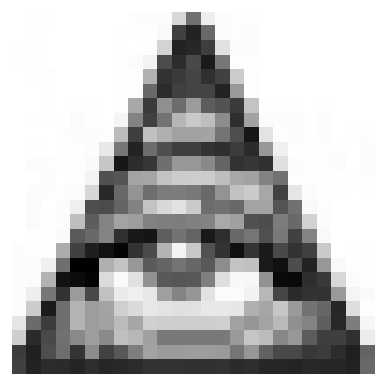

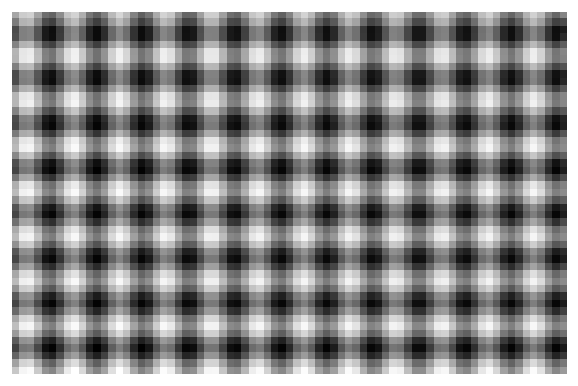

In [3]:
show_array(face)
show_array(background)

In [4]:
# some technical calculations
h, w = face.shape
H, W = background.shape

np.random.seed(89)
A = np.random.rand(H - h + 1, W - w + 1)
A /= A.sum()

# help class to create dataset
noiser = PictureNoiser(face, background, A)

The dataset is constructed the following way:
 - sample a random position on the background and place the face there
 - add normal noise to the resulting picture
 - repeat these two steps multiple times

The example is given below:

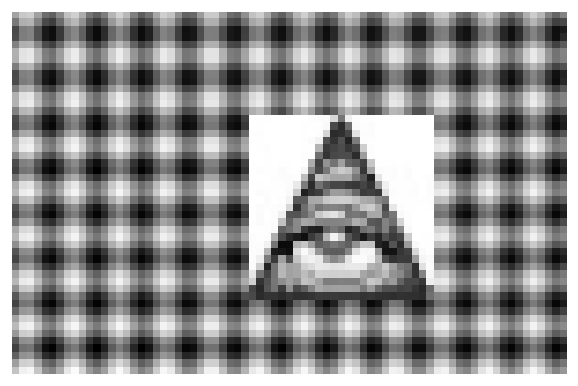

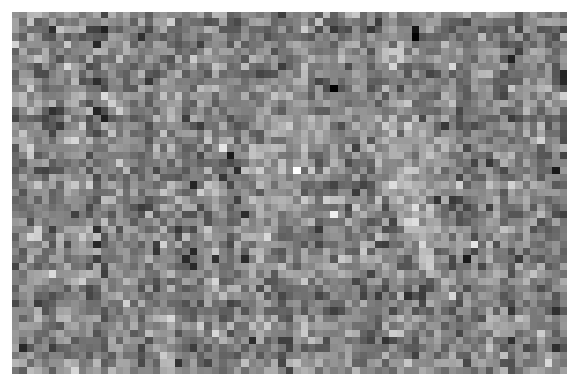

In [5]:
pic = noiser.allocate_face()
noise_pic = noiser.noise_image(pic, s=150)

show_array(pic)
show_array(noise_pic)

Create a dataset of 1000 pictures:

In [6]:
X = noiser.generate_sample(n=1000, s=150)

  0%|          | 0/1000 [00:00<?, ?it/s]

Some pictures:

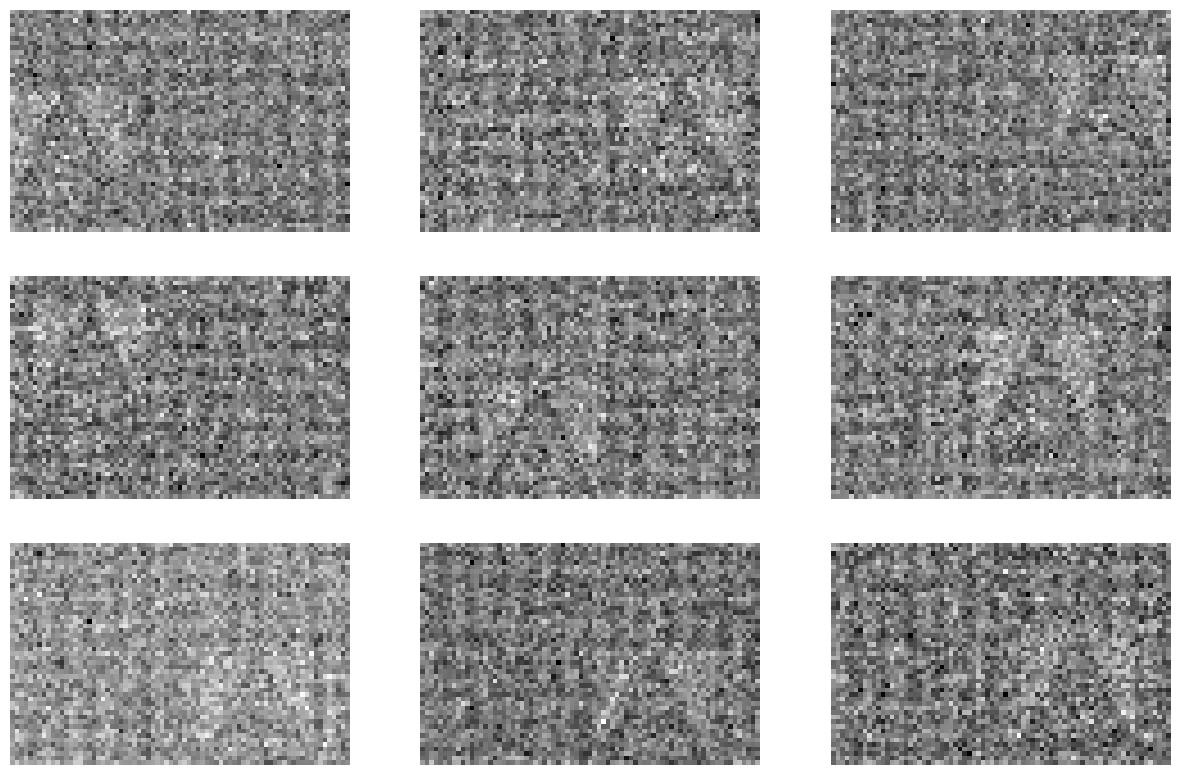

In [7]:
fig, ax = plt.subplots(3, 3, figsize=[15, 10], dpi=100)

for i in range(9):
    current_ax = ax[i // 3, i % 3]
    current_ax.axis("off")
    current_ax.imshow(X[:, :, i], cmap="gray")

The EM-algorithm from `em_alg.py` is a way tell apart where the face and the background are by maximizing the likelihood of the dataset:

In [8]:
F, B, s, A, LL = run_EM(X, h, w, tolerance=0.01, max_iter=10, use_MAP=False)

And here are the results:

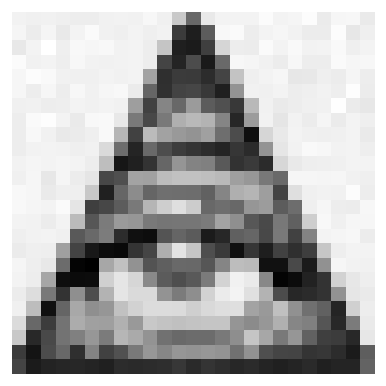

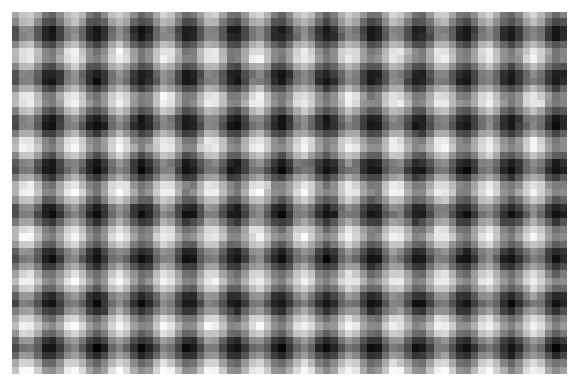

In [9]:
show_array(F)
show_array(B)